In [ ]:
# Rotation on axis of image 
# Zoom in image 
# Zoom out image 
# clockwise and counter clock wise rotation
# Noise - Gaussian and Uniform 

In [264]:
# Import train data.
from PIL import Image
import pickle
import numpy as np
import cv2
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline
import seaborn as sns

sns.set_style("white")

# TODO: Fill this in based on where you saved the training and testing data

training_file = "train.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
X_train, y_train = train['features'], train['labels']


validation_file = "validation.p"

with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
X_valid, y_valid = valid['features'], valid['labels']

In [296]:
import random
from PIL import Image
import pickle
import numpy as np
import cv2
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

"""
Creates a validation and test set from the given data.
You can specify the gray scale.

Note: Samples are stratified samples.

"""
def create_validation_dataset(X,y,gray=False,prob = 0.3):
    X_validation, X_test, y_validation, y_test = train_test_split(X, y, train_size=prob,stratify=y,random_state=59)
    if gray:
        GRAY = "_gray"
    else:
        GRAY = ""
        
    new_training_file = "test_final"+GRAY+".p"
    new_train = {}
    if not gray:
        new_train['features'] = np.asarray(X_test)
    else:
        new_train['features'] = np.asarray(gray_scale(X_test) )
    new_train['labels'] = y_test
    pickle.dump( new_train, open( new_training_file, "wb" ) )
    
    new_training_file = "validation"+GRAY+".p"
    new_train = {}
    if not gray:
        new_train['features'] = np.asarray(X_validation)
    else:
        new_train['features'] = np.asarray(gray_scale(X_validation) )
    new_train['labels'] = y_validation
    pickle.dump( new_train, open( new_training_file, "wb" ) )
    

"""
Converts the array of images into gray scale images

"""
def gray_scale(X):
    X_gray = []
    for each in X:
        #print(np.shape(each))
        gray_image = np.asarray(cv2.cvtColor(each, cv2.COLOR_RGB2GRAY))
        #print(type(gray_image))
        X_gray.append(np.expand_dims(gray_image,axis=2))
    #plt.imshow(X_gray[0])
    return X_gray


# Rotation of image 
"""
Rotate the image clockwise and counter clock wise. [-6,-4,-2,0,2,4,6]
6 images per image.

"""
def image_rotation(X,y):
    rot_X = []
    rot_y = []
    for ex,ey in zip(X,y):
        img = Image.fromarray(ex)
        
        for i in range(-12,13, 4):
            
            im2 = img.convert('RGBA')
            new_image = im2.rotate(i)
            # a white image same size as rotated image
            blank_img = Image.new('RGBA', (32,32), (255,)*4)
            # create a composite image using the alpha layer of rot as a mask
            out = Image.composite(new_image, blank_img, new_image)
            out.convert('RGB')
            rot_X.append(out)
            rot_y.append(ey)
    return rot_X,rot_y
"""
Blur the image with a kernel of 5x5

"""
def image_blur(X,y,kernel_size=5):
    blur_X =[]
    blur_y = []
    for ex,ey in zip(X,y):
        #kernel = np.ones((kernel_size,kernel_size),np.float32)/25
        blr_img = cv2.GaussianBlur(ex,(kernel_size,kernel_size),0)
        #blr_img = cv2.filter2D(ex,-1,kernel)
        blur_X.append(blr_img)
        blur_y.append(ey)
    return blur_X,blur_y

def noisy_data(X,y):
    row,col,ch = np.shape(X[0])
    noisy_X = []
    noisy_y = []
    for ex,ey in zip(X,y):
        noisy_image = np.asarray(
                        np.random.uniform(
                        -5,5,(row,col,ch))
                    ,dtype=np.uint8)+ex
               
        noisy_X.append(noisy_image)
        noisy_y.append(ey)
    return noisy_X,noisy_y

"""
Contrast Increase using HSV values.
"""
def contrast_increase_data(X,y,value=5):
    row,col,ch = np.shape(X[0])
    contra_X = []
    contra_y = []
    for ex,ey in zip(X,y):
        #contra_image = np.array(cv2.cvtColor(ex,cv2.COLOR_RGB2YUV),dtype=np.float32)
        
        img_yuv = cv2.cvtColor(ex, cv2.COLOR_RGB2YUV)

        # equalize the histogram of the Y channel
        img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])

        # convert the YUV image back to RGB format
        X_ = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2RGB)        
               
        contra_X.append(X_)
        contra_y.append(ey)
    return contra_X,contra_y

"""
Affain transformations of the images.
"""
def affain_transform(X,y,value=5):
    row,col,ch = np.shape(X[0])
    contra_X = []
    contra_y = []
    for ex,ey in zip(X,y):
        contra_image = cv2.cvtColor(ex,cv2.COLOR_RGB2HSV)
        
        contra_image[:,:,0] += value

        X_ = cv2.cvtColor(contra_image,cv2.COLOR_HSV2RGB)
        
               
        contra_X.append(X_)
        contra_y.append(ey)
    return contra_X,contra_y

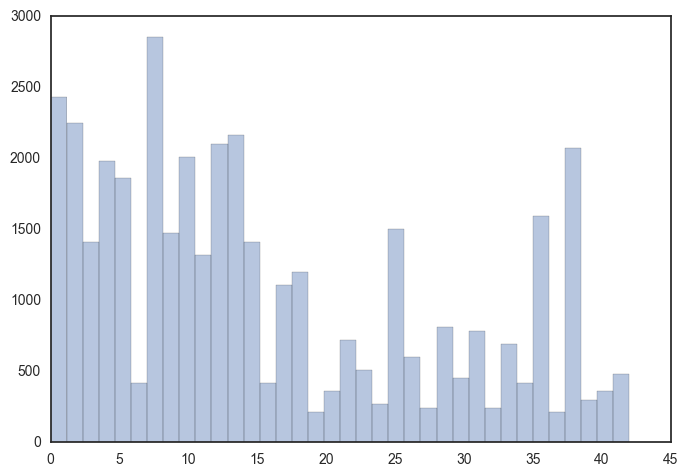

In [98]:
sns.distplot(y_train,kde=False);

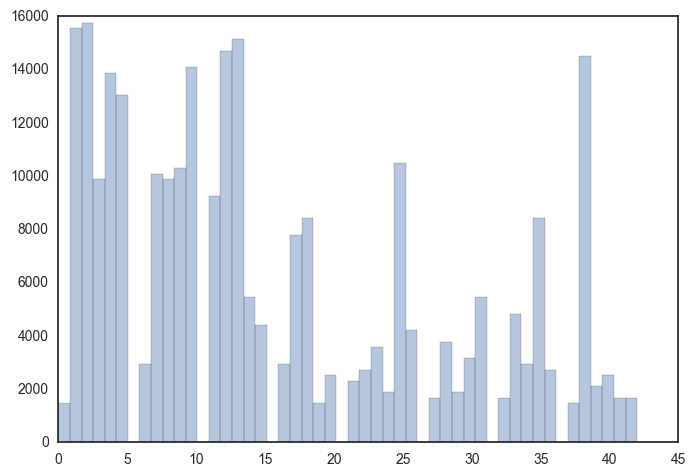

In [127]:
sns.distplot(y_rot,kde=False);

In [47]:
import pandas as pd
data = pd.read_csv("./signnames.csv")

In [48]:
data

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing


In [21]:
label_series = pd.Series(y_train)

In [24]:
label_values = label_series.value_counts()

In [ ]:
[]

In [151]:


"""
Plots the variations in the diagrams
"""
def plot_variations(X,X_orig,y_train, sign_name,num_var,num_examples = 5 ): 
    fig, axes = plt.subplots(nrows=num_examples, ncols=num_var+1)
    index_list = []
    sign_name_list =[]
    pad = 5 # in points

    for j in range(1,num_examples+1) :
        y_index = random.randint(0,len(y_train))
        index_list.append(y_index)
        sign_name_list.append(sign_name[y_train[y_index]])
    
    ax_lbls = axes[:,0]
    for ax, row in zip(ax_lbls, sign_name_list):
        ax.annotate(row.replace(" ","\n"), xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - pad, 0),
                xycoords=ax.yaxis.label, textcoords='offset points',
                size='small', ha='right', va='center')
        #ax.set_ylabel(row.replace(" ","\n"), rotation=0, size='small')  
    
    for j in range(1,num_examples+1) :
        y_index = index_list[j-1]
        image_index = y_index*num_var
        
        
        ax1 = axes[j-1,0]
        #ax1 = plt.subplot(num_examples,num_var,k)
        ax1.imshow(X_orig[y_index])
        ax1.get_xaxis().set_ticks([])
        ax1.get_yaxis().set_ticks([])
        for i in range(1,num_var +1):
            k = (num_var*(j-1))+i
            im_index = int(str(num_examples)+str(num_var)+str(k))
            
            ax1 = axes[j-1,i]
            #ax1 = plt.subplot(num_examples,num_var,k)
            ax1.imshow(X[image_index+i-1])
            ax1.get_xaxis().set_ticks([])
            ax1.get_yaxis().set_ticks([])
          
    #ax1.set_ylabel(sign_name[y_train[y_index]], rotation=0, size='small')
    fig.tight_layout()

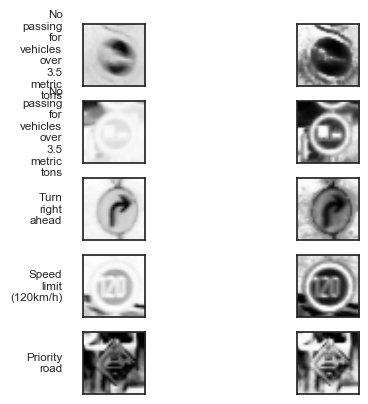

In [302]:
# sign_name = list(data.SignName)
X_rot,y_rot = contrast_increase_data(X_train,y_train,value=200)
X_new = gray_scale(X_rot)
X_train_gray = np.reshape(gray_scale(X_train),(len(X_train),32,32))
plot_variations(np.reshape(X_new,(len(X_new),32,32)),X_train_gray,y_train,sign_name,1,5)
#X_blr,y_blr = image_blur(X_train,y_train,kernel_size=3)
#plot_variations(X_blr,y_train,sign_name,1,3)
#X_noise,y_noise = noisy_data(X_train,y_train)
#plot_variations(X_noise,X_train,y_train,sign_name,1,4)

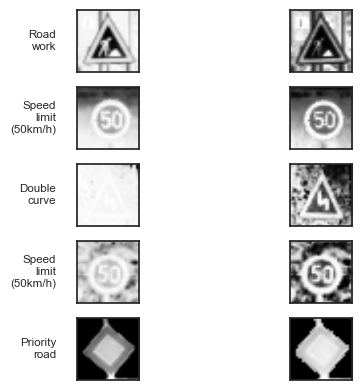

In [304]:
plot_variations(np.reshape(X_new,(len(X_new),32,32)),X_train_gray,y_train,sign_name,1,5)


In [80]:
?plt.axes

In [153]:
# Human Level Error 1%
# Training error 6%
# Validation set error 5%
# Much less than human error . High Bias in the data 
    # Train bigger model, More data
    
# Human Level Error 1%
# Training error 2%
# Validation set error 6%
# Much less than human error . High Varriance in the data (Overfitting)
    # Regulariser, early stopping, More data

# Human Level Error 1%
# Training error 5%
# Validation set error 10%
# High bias and hig varriance 
    #

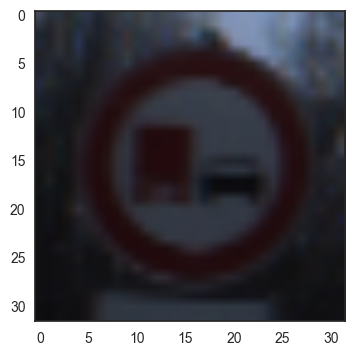

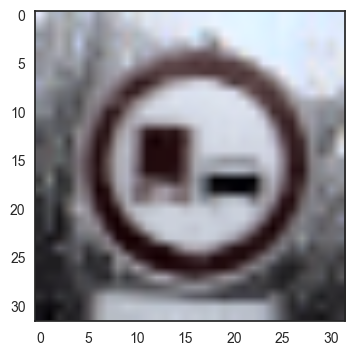

In [295]:
img = X_valid[0]
img_yuv = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)

# equalize the histogram of the Y channel
img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])

# convert the YUV image back to RGB format
img_output = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2RGB)
plt.imshow(img)
plt.show()
plt.imshow(img_output)

In [298]:
X_cont,y_cont = contrast_increase_data(X_valid,y_valid,value=200)
X_valid_new = gray_scale(X_cont)
X_valid_gray = np.reshape(gray_scale(X_cont),(len(X_cont),32,32))

In [299]:
np.shape(X_train[0])

(32, 32, 3)

In [300]:
new_training_file = "train_gray_contrast.p"
new_train = {}
new_train['features'] = np.asarray(X_new) 
new_train['labels'] = y_train
pickle.dump( new_train, open( new_training_file, "wb" ) )

In [301]:
new_training_file = "validation_gray_contrast.p"
new_train = {}
new_train['features'] = np.asarray(X_valid_new) 
new_train['labels'] = y_valid
pickle.dump( new_train, open( new_training_file, "wb" ) )